# Preprocesamiento de datos

## Introducción

En esta sesión vamos a ver los aspectos básicos y herramientas que nos va a permitir desarrollar técnicas de preprocesamiento de datos en `python`. 

<div class="alert alert-info">
  <strong>Librerías necesarias:</strong> 
  
  `pandas`, `math`, `numpy`, `missingno`, `matplotlib`, `seaborn`, `scikit-learn` y `imbalanced-learn`.
</div>


In [1]:
pip install pandas numpy missingno matplotlib seaborn scikit-learn imbalanced-learn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached joblib-1.4.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached threadpoolctl-3.5.0-py3-none-any.whl.metadata (13 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.1/11.1 MB 649.3 kB/s eta 0:00:0000:0100:01
Using cached joblib-1.4.2-py3-none-any.whl (301 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.8/24.8 MB 365.4 kB/s eta 0:00:0000:0100:02
Using cached threadpoolctl-3.5.0-py3-none-any.whl (18 kB)
Note: you may need to restart the kernel to use updated packages.


In [2]:
import math
import pandas as pd
import numpy as np


## Valores ausentes

Al igual que en la mayoría de los lenguajes de programación, en `python` también podemos encontrar valores especiales que indican alguna excepción respecto a los valores normales. En lo que se refiere a los valores numéricos ausentes, `python` indica los valores ausentes principalmente por `NaN` (del inglés *not a number*, especificado mediante `math.nan` o mediante `numpy.nan` si usamos `numpy`). o por el símbolo `None`.

Por ejemplo, dado el siguiente dataframe:

In [48]:
df = pd.DataFrame({"a": [None, 1, 2], "b": [3, np.nan, 1]})  

print(df)

     a    b
0  NaN  3.0
1  1.0  NaN
2  2.0  1.0


Podemos ver que `pandas` convierte el `None` a `NaN`, uniformizando la representación de los datos ausentes. 

¿Qué pasaría si le añadimos dos columnas, de tipo entero y real, pero sin ningún valor?

In [49]:
df['c'] = pd.Series(dtype='int32')
df['d'] = pd.Series(dtype='float32')

print(df)

     a    b   c   d
0  NaN  3.0 NaN NaN
1  1.0  NaN NaN NaN
2  2.0  1.0 NaN NaN


<div class="alert alert-danger">
<strong>Atención:</strong>

Otros valores especiales como la cadena vacía o el infinito (<code>math.inf</code> o <code>numpy.Inf</code>) no se consideran valores ausentes. 
</div>

De manera equivalente, para representar datos temporales ausentes se emplea el `NaT` (del ingles *not a time*, especificado mediante `numpy.nat`). Por ejemplo, si añadimos al dataframe anterior una columna con fechas, con valores ausentes:

In [54]:
df['t'] = pd.Series([pd.Timestamp("2025-01-01"), None, None])

print(df)

      a     b     c     d          t
0  <NA>     3  <NA>  <NA> 2025-01-01
1     1  <NA>  <NA>  <NA>        NaT
2     2     1  <NA>  <NA>        NaT


Desde `pandas` 1.4.0 existe un valor especial más, denominado `NA` (`pd.NA`), que unifica el comportamiento de los valores previos para cualquier tipo de datos, de forma que no tengamos que escoger entre usar `None`, `NaN` o `NaT`. Este valor se emplea en tipos de datos nullables de `pandas`, por lo que si convertimos los tipos de `numpy`, la transformación se hará automáticamente. De todos modos, éste es todavia un valor experimental (como se puede apreciar, los tipos temporales aun no lo soportan) y muchos algoritmos de aprendizaje no pueden gestionarlo, por lo que se recomienda usarlo con cautela. 

In [56]:
df = df.convert_dtypes()

print(df)

      a     b     c     d          t
0  <NA>     3  <NA>  <NA> 2025-01-01
1     1  <NA>  <NA>  <NA>        NaT
2     2     1  <NA>  <NA>        NaT


<div class="alert alert-warning">
<strong>Nota:</strong>

Los valores especiales, como su propio nombre indica, funcionan de una forma particular a la hora de realizar comparaciones. Así, <code>None == None</code>, pero <code>np.nan != np.nan</code>. 

Por esto, siempre que queramos comprobar si un dato está ausente o no, emplearemos los métodos <code>isnull()/isna()</code> y <code>notnull()/notna()</code>. 

Además, los valores NA se propagan en las operaciones aritméticas, pero no en las operaciones de reducción de dataframes/series.
</div>

In [59]:
df.isnull()

,a,b,c,d,t
0,True,False,True,True,False
1,False,True,True,True,True
2,False,False,True,True,True


In [60]:
df.isna()

,a,b,c,d,t
0,True,False,True,True,False
1,False,True,True,True,True
2,False,False,True,True,True


In [70]:
df.notna()

,a,b,c,d,t
0,False,True,False,False,True
1,True,False,False,False,False
2,True,True,False,False,False


<div class="alert alert-info">
<strong>Ejercicio:</strong> 
  
Teniendo en cuenta las anteriores definiciones, intenta descubrir el resultado de las siguientes operaciones y porqué se produce dicho resultado:

- `None == None`
- `math.nan == None`
- `pd.NA == np.nan`

- `pd.NA + 1`

- `sum([pd.NA, 1, 2])`
- `sum([np.NaN, 1, 2])`
- `pd.Series([pd.NA, 1, 2]).sum()`

- `len([pd.NA, 1, 2, 3])`
</div>


In [18]:
print(f'None == None: {None == None}')
print(f'math.nan == None: {math.nan == None}')
print(f'pd.NA == np.nan: {pd.NA == np.nan}')
print(f'pd.Na + 1: {pd.NA + 1}')
print(f'sum([pd.NA, 1, 2]): {sum([pd.NA, 1, 2])}')
print(f'sum([np.nan, 1, 2]): {sum([np.nan, 1, 2])}')
print(f'pd.Series([pd.NA, 1, 2]).sum(): {pd.Series([pd.NA, 1, 2]).sum()}')
print(f'len([pd.NA, 1, 2, 3]): {len([pd.NA, 1, 2, 3])}')

None == None: True
math.nan == None: False
pd.NA == np.nan: <NA>
pd.Na + 1: <NA>
sum([pd.NA, 1, 2]): <NA>
sum([np.nan, 1, 2]): nan
pd.Series([pd.NA, 1, 2]).sum(): 3
len([pd.NA, 1, 2, 3]): 4


* `None == None`. Como `None` es un objeto único, la comparación de dos objetos `None` siempre devolverá `True`.
* `math.nan == None`. `math.nan` es un valor especial que no es igual a ningún otro valor, por lo que la comparación devolverá `False`.
* `pd.NA == np.nan`. `pd.NA` y `np.nan` son valores especiales que representan un valor ausente, por lo que es una comparación desconocida y devolverá un valor ausente. El primero se propaga en las igualdades, mientras que el segundo no.
* `pd.NA + 1`. Cualquier operación arimética con un valor ausente dará un valor ausente.
* `sum([pd.NA, 1, 2])`. Esto es una operación aritmética, en el sentido que se empieza en 0 y se van sumando los elementos de la lista. Como un elemento es un valor ausente, el resultado será un valor ausente.
* `sum([np.NaN, 1, 2])`. Mismo razonamiento que antes.
* `pd.Series([pd.NA, 1, 2]).sum()`. Obtenemos un resultado ya que el método `sum()` de `pandas` ignora los valores ausentes.
* `len([pd.NA, 1, 2, 3])`. `pd.NA` es un elemento de la lista, aunque sea un valor especial no ausente.

## Lectura de datos

`pandas` es capaz de leer y procesar datos [en multitud de formatos](https://pandas.pydata.org/docs/user_guide/io.html). En esta práctica nos centraremos en la lectura de datos en forma de tabla y en formato texto (la mayoría de las aplicaciones pueden exportar a este formato). A groso modo podemos decir que un dataset es técnicamente correcto cuando:

- está almacenado en un `Dataframe` con los nombres adecuados para las columnas (atributos), y 
- cada columna es del tipo de dato acorde con el domino de la variable que representa. Por ejemplo, los datos categóricos deben estar definidos como `category` y los números como `float` o `int`.


<div class="alert alert-danger">
<strong>Atención:</strong>

En tareas de clasificación, hay que asegurarse de que la variable que indica la clase esté definida como <code>category</code>. 
Esto se debe a que hay casos en que las clases se etiquetan con números <code>0, 1, ...</code>.
Al importar esta información, <code>python</code> entiende que la variable es numérica, y cuando intentemos crear modelos de clasificación, puede que genere modelos de regresión. 
</div>


<div class="alert alert-info">
<strong>Ejercicio:</strong> 
  
Abre con algún editor el fichero `hepatitis.csv` que podrás encontrar en el campus virtual.

1. ¿Cuáles crees que deben ser los tipos asociados a cada columna?
2. ¿Existen valores desconocidos? ¿Cómo están representados?
3. ¿Qué información crees que falta?
</div>


1. La segunda y la última columna (la 20), son de tipo `str`, aunque deberían ser enteros, la 14 y la 17 son de tipo `float` y el resto son de tipo `int`.
2. Existen valores desconocidos que se representan con un `*`.
3. La información ausente más importante sería una cabecera o algún tipo de descripción de qué representa cada columna, ya que no se da ningún tipo de información sobre los datos.

Las función más básicas que ofrece `pandas` para leer datos en formato texto son:

- `read_csv()` para valores separados por comas con el punto para separar decimales         
- `read_table()` para valores separados por tabuladores u otros delimitadores  

Todas estas funciones aceptan entre otros los siguientes parámetros:

- `header` para indicar si la primera fila contiene los nombres de las columnas
- `names` para indicar en un array de strings con los nombres de las columnas
- `na_values` para indicar con un array cómo se representan los valores ausentes
- `delimiter` para indicar el caracter con el que se separan las celdas  
- `decimal` para indicar el caracter de punto decimal      
- `quotechar` para indicar el caracter que indica una cadena de texto


<div class="alert alert-warning">
<strong>Nota:</strong>

Cuando importes unos datos con algunas de estas funciones, examínalos primero con funciones como 
<code>head()</code> o <code>info()</code>.
</div>


<div class="alert alert-info">
<strong>Ejercicio:</strong> 

Lee el fichero <code>hepatitis.csv</code> y guárdalo en la variable <code>df</code>. Examina su cabecera. ¿Qué sucede? 
</div>

In [27]:
ruta = './Datos/hepatitis.csv'
df = pd.read_csv(ruta)
df.head()

,30,1,0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.10,1.0,85,18,4.0,*,0.11,1.1
0,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
1,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
2,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
3,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,0.9,95,28,4.0,75,0,1


Si lo cargamos con la función `read_csv` sin especificar ningún parámetro, `pandas` asume que la primera fila contiene los nombres de las columnas. En este caso, como comentamos antes, no tenemos cabecera, por lo que habría que especificar `header=None`.

<div class="alert alert-info">
<strong>Ejercicio:</strong> 

Carga ahora el fichero empleando la opcion <code>header=None</code>. ¿Que sucede en este caso?
</div>

In [28]:
df = pd.read_csv(ruta, header=None)
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


Ahora tenemos todos los datos dentro del DataFrame y las columnas enumeradas, comenzando en 0.

Podemos obtener más detalle de nuestro conjunto de datos a través de la función `info`:

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       155 non-null    int64 
 1   1       155 non-null    int64 
 2   2       155 non-null    object
 3   3       155 non-null    int64 
 4   4       155 non-null    object
 5   5       155 non-null    object
 6   6       155 non-null    object
 7   7       155 non-null    object
 8   8       155 non-null    object
 9   9       155 non-null    object
 10  10      155 non-null    object
 11  11      155 non-null    object
 12  12      155 non-null    object
 13  13      155 non-null    object
 14  14      155 non-null    object
 15  15      155 non-null    object
 16  16      155 non-null    object
 17  17      155 non-null    object
 18  18      155 non-null    int64 
 19  19      155 non-null    int64 
dtypes: int64(5), object(15)
memory usage: 24.3+ KB


Una vez cargado el fichero correctamente, el siguiente paso consiste en nombrar de forma correcta sus columnas. En nuestro caso, el nombre de cada una de las columnas aparece como información adicional y deberían nombrarse como: *EDAD*, *SEXO*, *ESTEROIDES*, *ANTIVIRALES*, *FATIGA*, *MALAISE*, *ANOREXIA*, *HIGgrande*, *HIGfirme*, *BAZOpalpa*, *ARANIASvac.*, *ASCITIS*, *VARICES*, *BILIRRUBINA*, *FOSFATOalc*, *SGOT*, *ALBUMINA*, *PROTIME*, *HISTIOLOGIA* y *PRONOSTICO*. Para que las columnas de nuestro conjunto de datos adopten estos nombres debemos ejecutar lo siguiente:

In [23]:
colnames = ["EDAD", "SEXO", "ESTEROIDES", "ANTIVIRALES","FATIGA", "MALAISE", 
            "ANOREXIA", "HIGgrande", "HIGfirme", "BAZOpalpa", "ARANIASvac", 
            "ASCITIS", "VARICES", "BILIRRUBINA", "FOSFATOalc", "SGOT", 
            "ALBUMINA", "PROTIME", "HISTIOLOGIA", "PRONOSTICO"]
df.columns = colnames
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


Este paso tambien se podría hacer directamente al llamar la función `read_csv` indicando los nombres de las columnas en el parámetro `names`:

In [29]:
df = pd.read_csv(ruta, header=None, names=colnames)
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,*,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,*,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,*,0,1
3,31,0,*,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,*,200,4.0,*,0,1


<div class="alert alert-warning">
<strong>Nota:</strong>

Este paso nos lo podemos saltar en el caso que el conjunto de datos incluya dichos nombres en la primera línea, colocando el parámetro <code>header=0</code> al llamar a la función <code>read_csv</code>.
</div>

El último paso sería sustituir los `*` que representan los valores ausentes en el fichero que acabamos de cargar. Si lo queremos hacer de forma manual, podríamos ejecutar la función `replace` indicando el valor a reemplazar y su valor sustituto:

In [30]:
df = df.replace('*', pd.NA)
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,<NA>,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,<NA>,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,<NA>,0,1
3,31,0,<NA>,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,<NA>,200,4.0,<NA>,0,1


Otra opción sería indicarlo directamente durante la carga del fichero:

In [44]:
df = pd.read_csv(ruta, header=None, names=colnames, na_values='*')
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,85.0,18.0,4.0,NaN,0,1
1,50,0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.9,135.0,42.0,3.5,NaN,0,1
2,78,0,1.0,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,96.0,32.0,4.0,NaN,0,1
3,31,0,NaN,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.7,46.0,52.0,4.0,80.0,0,1
4,34,0,1.0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN,200.0,4.0,NaN,0,1


<div class="alert alert-info">
<strong>Ejercicio:</strong> 

¿Qué código usarias para cargar los datos directamente con los nombres de las columnas e interpretando los datos faltantes como NA en lugar de como NaN?
</div>

In [93]:
df = pd.read_csv(ruta, header=None, names=colnames, na_values='*').convert_dtypes()
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,0,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,<NA>,0,1
1,50,0,0,0,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,<NA>,0,1
2,78,0,1,0,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,<NA>,0,1
3,31,0,<NA>,1,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,1
4,34,0,1,0,0,0,0,1,0,0,0,0,0,1.0,<NA>,200,4.0,<NA>,0,1


## Conversión de tipos

Una vez interpretados de forma correcta los valores ausentes y nombradas las columnas, el siguiente paso en el preprocesamiento de datos consiste en definir los tipos de datos adecuados para cada columna. Esto lo podemos hacer mediante las funciones `astype` de `python`. Por ejemplo, para convertir la variable `PROTIME` a variable entera, sólo deberíamos ejecutar el siguiente comando:

In [94]:
df['PROTIME'] = df['PROTIME'].astype('Int64')   # Int64 es un tipo especial de entero que soporta el NaN 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    Int64  
 1   SEXO         155 non-null    Int64  
 2   ESTEROIDES   154 non-null    Int64  
 3   ANTIVIRALES  155 non-null    Int64  
 4   FATIGA       154 non-null    Int64  
 5   MALAISE      154 non-null    Int64  
 6   ANOREXIA     154 non-null    Int64  
 7   HIGgrande    145 non-null    Int64  
 8   HIGfirme     144 non-null    Int64  
 9   BAZOpalpa    150 non-null    Int64  
 10  ARANIASvac   150 non-null    Int64  
 11  ASCITIS      150 non-null    Int64  
 12  VARICES      150 non-null    Int64  
 13  BILIRRUBINA  149 non-null    Float64
 14  FOSFATOalc   126 non-null    Int64  
 15  SGOT         151 non-null    Int64  
 16  ALBUMINA     139 non-null    Float64
 17  PROTIME      88 non-null     Int64  
 18  HISTIOLOGIA  155 non-null    Int64  
 19  PRONOSTI

Se podría hacer lo mismo con atributos de otros tipos. Por ejemplo, el atributo ANTIVIRALES es de tipo lógico, indicados por 0s y 1s: 

In [95]:
df['ANTIVIRALES'] = df['ANTIVIRALES'].astype('boolean')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   EDAD         155 non-null    Int64  
 1   SEXO         155 non-null    Int64  
 2   ESTEROIDES   154 non-null    Int64  
 3   ANTIVIRALES  155 non-null    boolean
 4   FATIGA       154 non-null    Int64  
 5   MALAISE      154 non-null    Int64  
 6   ANOREXIA     154 non-null    Int64  
 7   HIGgrande    145 non-null    Int64  
 8   HIGfirme     144 non-null    Int64  
 9   BAZOpalpa    150 non-null    Int64  
 10  ARANIASvac   150 non-null    Int64  
 11  ASCITIS      150 non-null    Int64  
 12  VARICES      150 non-null    Int64  
 13  BILIRRUBINA  149 non-null    Float64
 14  FOSFATOalc   126 non-null    Int64  
 15  SGOT         151 non-null    Int64  
 16  ALBUMINA     139 non-null    Float64
 17  PROTIME      88 non-null     Int64  
 18  HISTIOLOGIA  155 non-null    Int64  
 19  PRONOSTI

<div class="alert alert-info">
<strong>Ejercicio:</strong> 
    
- Convierte los atributos ESTEROIDES, ANOREXIA, VARICES, HISTIOLOGIA, HIGgrande, HIGfirme, BAZOpalpa, FATIGA, ARANIASvac, ASCITIS, MALAISE a valores lógicos. 

- Convierte FOSFATOalc y SGOT a enteros.  
    
¿Qué pasa con los NaN de esas columnas?
    
</div>

Como FOSFATOalc y SGOT ya son enteros (`Int64`), no es necesario hacer ninguna conversión.

In [96]:
booleanos = ['ESTEROIDES', 'ANOREXIA', 'VARICES', 'HISTIOLOGIA', 'HIGgrande', 'HIGfirme', 'BAZOpalpa', 'FATIGA', 'ARANIASvac', 'ASCITIS', 'MALAISE']
df[booleanos] = df[booleanos].astype('boolean')
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,1
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,1
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,1
3,31,0,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,1
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,1


Al convertir las columnas a booleanos, se transforman los `0` en `False` y los `1` en `True` (en python, en general, cualquier valor distinto de `0` se evalúa como `True`). Los valores ausentes son especiales, como vimos en las comparativas anteriores (como si trataramos con un valor infinito en matemáticas), por lo que se mantienen como valores ausentes.

<div class="alert alert-warning">
<strong>Nota:</strong>

Como hemos visto anteriormente, tambien podemos usar la funcion <code>convert_dtypes()</code> para inferir automáticamente los tipos que mejor se adecuan a partir de los valores observados. No obstante, esto no siempre funciona bien, pues <code>pandas</code> no conoce la <i>semantica</i> de los datos. Así, puede que una variable codificada con números represente realmente categorias, y llamando a <code>convert_dtypes()</code> la catalogaríamos como numérica. De la misma forma, una columna con los nombres de los días de la semana se catalogará como cadena de caracteres, cuando realmente debería ser catalogada como categorica (el número de valores posibles está limitado). Es por ello que, aunque pueda servir como un punto de partida para la definición de los tipos, siempre deberemos comprobar la estructura de nuestro datafame tras aplicar esta operación para asegurarnos de que los tipos inferidos son correctos y, en caso de que no lo sean, corregirlos.  
</div>

Llegados a este punto, nos queda por tratar de forma correcta los atributos originales. En este caso obsérvese que el atributo PRONOSTICO está definido como entero y, por lo tanto, si se intentasen aplicar técnicas de clasificación, o bien no se podrán realizar o se construiría un modelo de regresión al estar definido dicho atributo como entero. Para solucionar este problema, bastaría con indicar que es una categoría a través de la función `astype()`. 

Sin embargo, en estos casos sería más interesante que los elementos de la enumeración fuesen más informativos. En nuestro caso, sería deseable cambiar el 0 y el 1 por FALLECE Y VIVE, respectivamente. Esta recodificación de etiquetas se puede hacer utilizando la función `mask()` del dataframe de la siguiente forma:

In [103]:
if not isinstance(df['PRONOSTICO'][0], str):
    df['PRONOSTICO'] = df['PRONOSTICO'].map({0: 'FALLECE', 1: 'VIVE'})

df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,VIVE
1,50,0,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,VIVE
2,78,0,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,VIVE
3,31,0,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,VIVE
4,34,0,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,VIVE


Una vez hecho este cambio, ya podríamos indicar que la columna es una categoría:

In [101]:
df['PRONOSTICO'] = df['PRONOSTICO'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EDAD         155 non-null    Int64   
 1   SEXO         155 non-null    Int64   
 2   ESTEROIDES   154 non-null    boolean 
 3   ANTIVIRALES  155 non-null    boolean 
 4   FATIGA       154 non-null    boolean 
 5   MALAISE      154 non-null    boolean 
 6   ANOREXIA     154 non-null    boolean 
 7   HIGgrande    145 non-null    boolean 
 8   HIGfirme     144 non-null    boolean 
 9   BAZOpalpa    150 non-null    boolean 
 10  ARANIASvac   150 non-null    boolean 
 11  ASCITIS      150 non-null    boolean 
 12  VARICES      150 non-null    boolean 
 13  BILIRRUBINA  149 non-null    Float64 
 14  FOSFATOalc   126 non-null    Int64   
 15  SGOT         151 non-null    Int64   
 16  ALBUMINA     139 non-null    Float64 
 17  PROTIME      88 non-null     Int64   
 18  HISTIOLOGIA  155 non-null    b

<div class="alert alert-warning">
<strong>Nota:</strong>

Podemos consultar los valores permitidos en una variable categorica consultando el dtype de dicha columna. 
</div>

<div class="alert alert-info">
  <strong>Ejercicio:</strong>
  
- Transforma el atributo SEXO en una categoría y asigna al 1 la etiqueta MASCULINO y al 0 la etiqueta FEMENINO.

</div>

In [108]:
if not isinstance(df['SEXO'][0], str):
    df['SEXO'] = df['SEXO'].map({0: 'FEMENINO', 1: 'MASCULINO'})

df['SEXO'] = df['SEXO'].astype('category')
df.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,MASCULINO,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,VIVE
1,50,FEMENINO,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,VIVE
2,78,FEMENINO,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,VIVE
3,31,FEMENINO,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,VIVE
4,34,FEMENINO,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,VIVE


## Análisis de valores ausentes

Antes de empezar a tratar los valores ausentes es conveniente estudiar la distribución de los mismos. En gran medida, podemos hacernos una idea de estos al ejecutar la función `info()`.

In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   EDAD         155 non-null    Int64   
 1   SEXO         155 non-null    category
 2   ESTEROIDES   154 non-null    boolean 
 3   ANTIVIRALES  155 non-null    boolean 
 4   FATIGA       154 non-null    boolean 
 5   MALAISE      154 non-null    boolean 
 6   ANOREXIA     154 non-null    boolean 
 7   HIGgrande    145 non-null    boolean 
 8   HIGfirme     144 non-null    boolean 
 9   BAZOpalpa    150 non-null    boolean 
 10  ARANIASvac   150 non-null    boolean 
 11  ASCITIS      150 non-null    boolean 
 12  VARICES      150 non-null    boolean 
 13  BILIRRUBINA  149 non-null    Float64 
 14  FOSFATOalc   126 non-null    Int64   
 15  SGOT         151 non-null    Int64   
 16  ALBUMINA     139 non-null    Float64 
 17  PROTIME      88 non-null     Int64   
 18  HISTIOLOGIA  155 non-null    b

También podríamos verlos utilizando la función `isna()`. Si la acompañamos de la funcion `any()` podemos obtener un resumen por columnas:

In [110]:
df.isna().any()

EDAD           False
SEXO           False
ESTEROIDES      True
ANTIVIRALES    False
FATIGA          True
MALAISE         True
ANOREXIA        True
HIGgrande       True
HIGfirme        True
BAZOpalpa       True
ARANIASvac      True
ASCITIS         True
VARICES         True
BILIRRUBINA     True
FOSFATOalc      True
SGOT            True
ALBUMINA        True
PROTIME         True
HISTIOLOGIA    False
PRONOSTICO     False
dtype: bool

Si utilizamos el agregador `sum()` obtendríamos el total de valores ausentes por columna:

In [111]:
df.isna().sum()

EDAD            0
SEXO            0
ESTEROIDES      1
ANTIVIRALES     0
FATIGA          1
MALAISE         1
ANOREXIA        1
HIGgrande      10
HIGfirme       11
BAZOpalpa       5
ARANIASvac      5
ASCITIS         5
VARICES         5
BILIRRUBINA     6
FOSFATOalc     29
SGOT            4
ALBUMINA       16
PROTIME        67
HISTIOLOGIA     0
PRONOSTICO      0
dtype: int64

<div class="alert alert-warning">
<strong>Nota:</strong>

Si quisiesemos obtener las estadísticas a nivel de dataframe bastaría con volver a aplicar las funciones correspondientes sobre el resultado anterior. Es decir, usando `df.isna().any().any()` sabríamos, por ejemplo, si nuestro dataframe contiene algun valor faltante.
</div>

In [112]:
df.isna().any().any()

np.True_

<div class="alert alert-info">
<strong>Ejercicio:</strong>

¿Como obtendrías el total de valores faltantes en el dataframe y la media de valores faltantes por columna?
</div>

In [114]:
# Total de valores faltantes en todo el DataFrame
total = df.isna().sum().sum()
valor_medio = df.isna().sum().mean()

print("Total de valores faltantes:", total)
print("Media de valores faltantes por columna:", valor_medio)

Total de valores faltantes: 167
Media de valores faltantes por columna: 8.35


Si queremos ir más allá, podemos representar gráficamente los resultados anteriores a través de la librería `missingno`.

In [115]:
import missingno as mi

La función `bar()` nos permite ver la distribución de datos ausentes en un diagrama de barras agrupado por columnas: 

<Axes: >

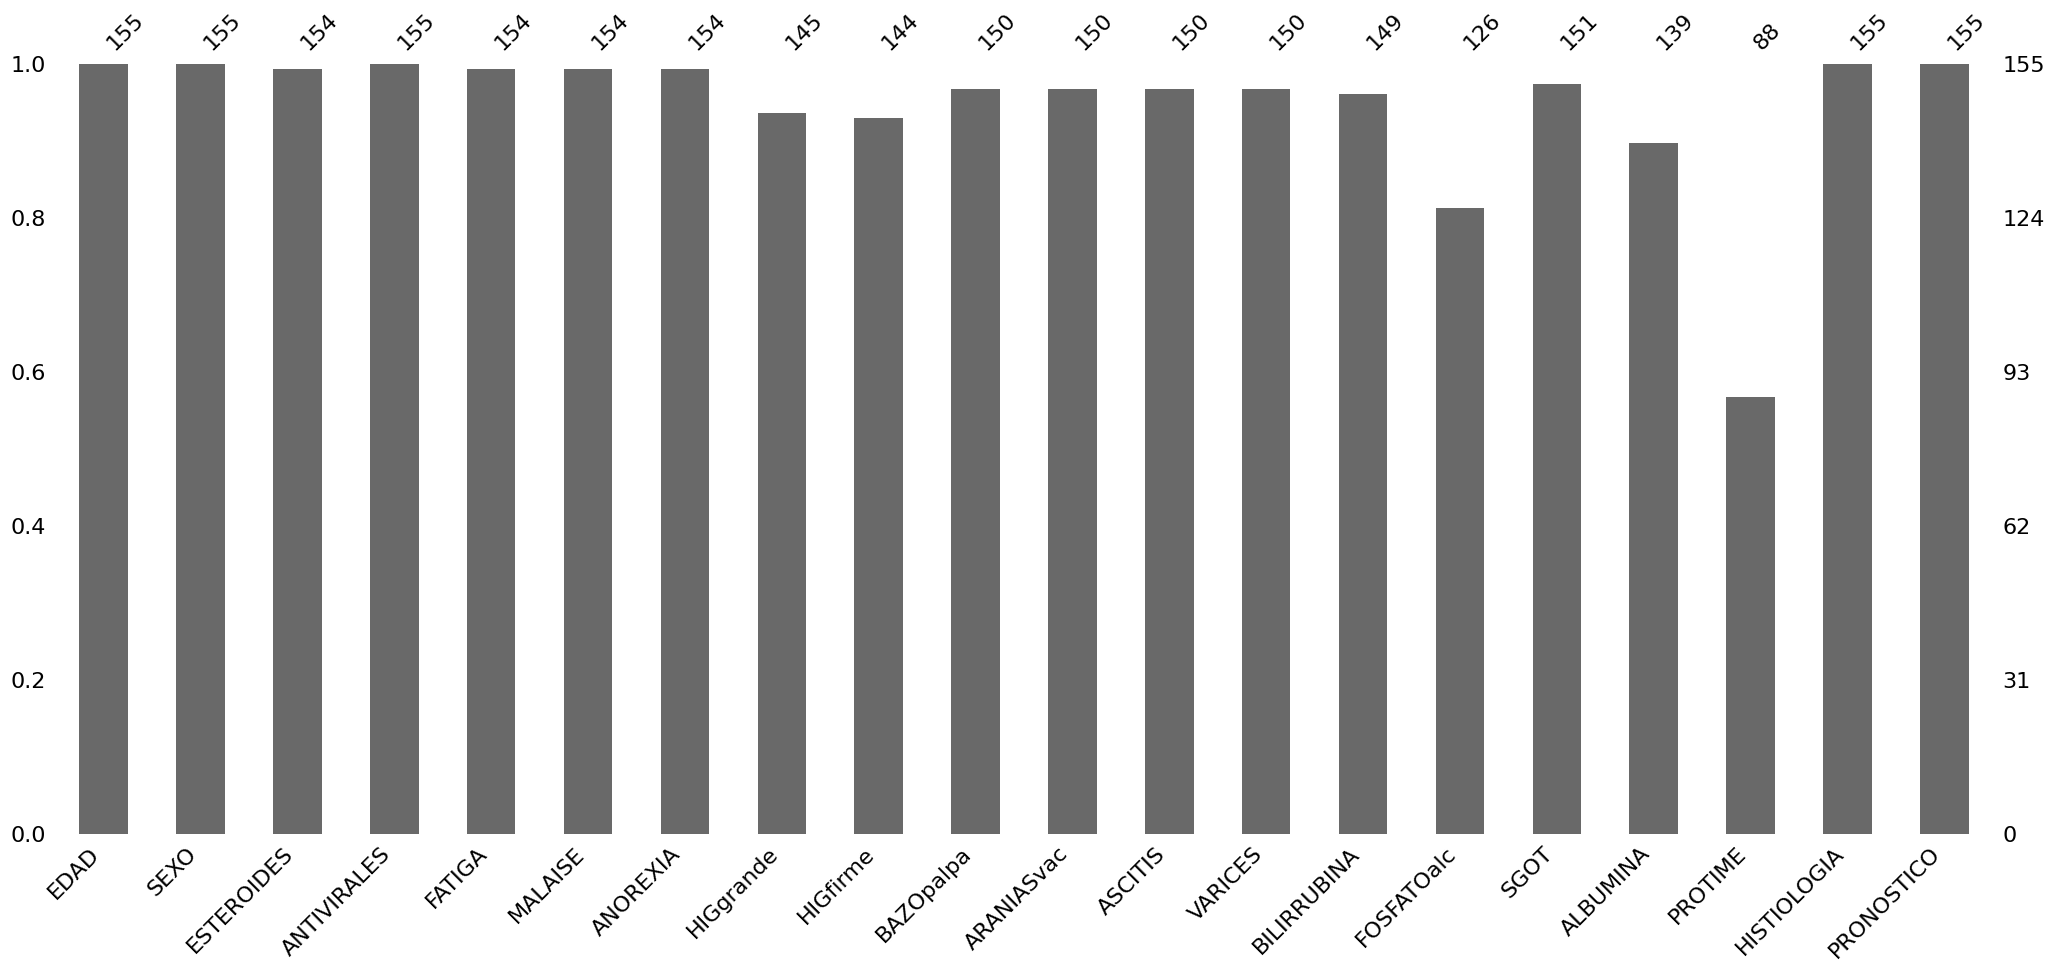

In [116]:
mi.bar(df)

Otra visualización es en forma matricial, donde cada fila representa uno de los objetos, y los valores ausentes se representan en blanco. 

<Axes: >

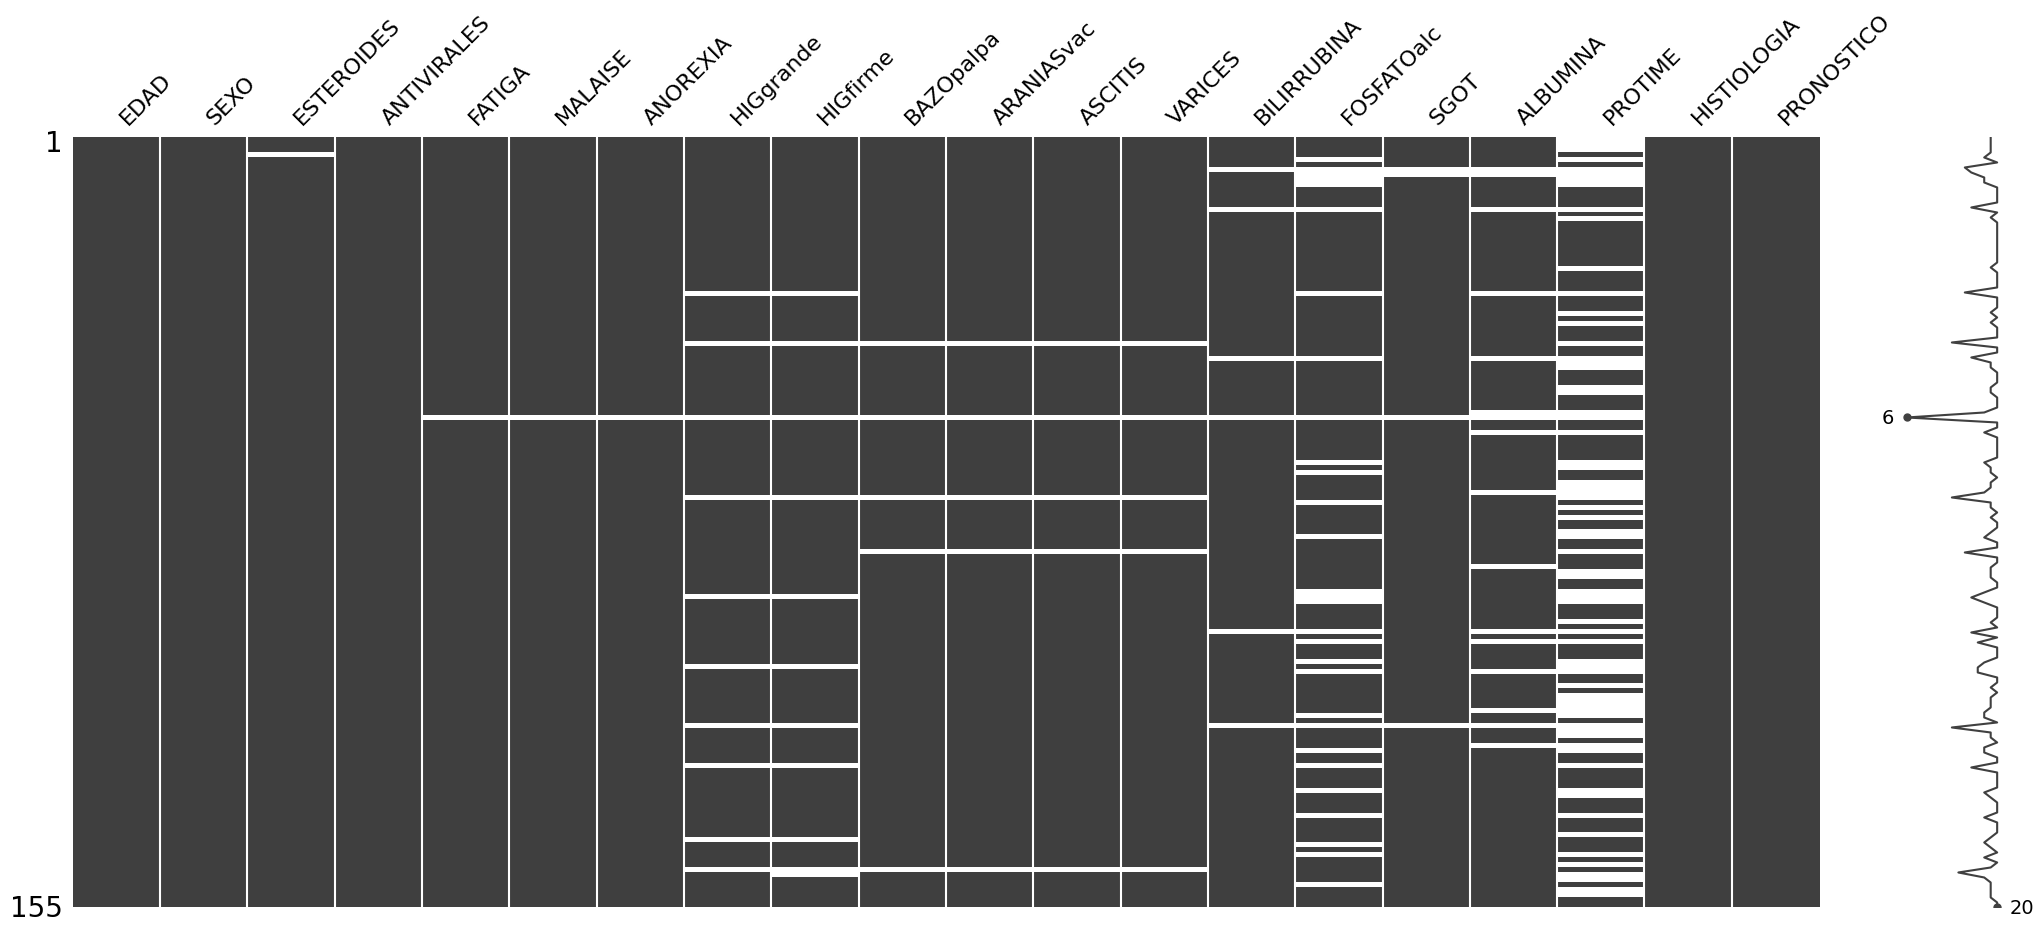

In [117]:
mi.matrix(df)

En la parte derecha del gráfico hay una línea que nos indica cuantas columnas tienen un valor para cada objeto. Así, va desde 0 a la izquierda, hasta el número total de columnas a la derecha. Cuando un objeto tiene todos los valores, la línea estará en la posición máxima a la derecha. A medida que los valores faltantes aumentan dentro de un objeto, la línea se moverá hacia la izquierda.

Los mapas de calor proporcionan otra forma de representar esta información permitiendo, además, identificar correlaciones de la nulidad entre cada una de las diferentes columnas. En otras palabras, se puede utilizar para identificar si existe una relación en la presencia de valores nulos entre cada una de las columnas.

Valores próximos a +1 indican que la presencia de valores nulos en una columna está correlacionada con la presencia de valores nulos en otra columna.

Los valores próximos a -1 indican que la presencia de valores nulos en una columna está anticorrelacionada con la presencia de valores nulos en otra columna. En otras palabras, cuando hay valores nulos en una columna, hay valores de datos presentes en la otra columna, y viceversa.

Los valores cercanos a 0, indican que hay poca o ninguna relación entre la presencia de valores nulos en una columna en comparación con otra.

El mapa de calor se puede generar a través del siguiente comando: 

<Axes: >

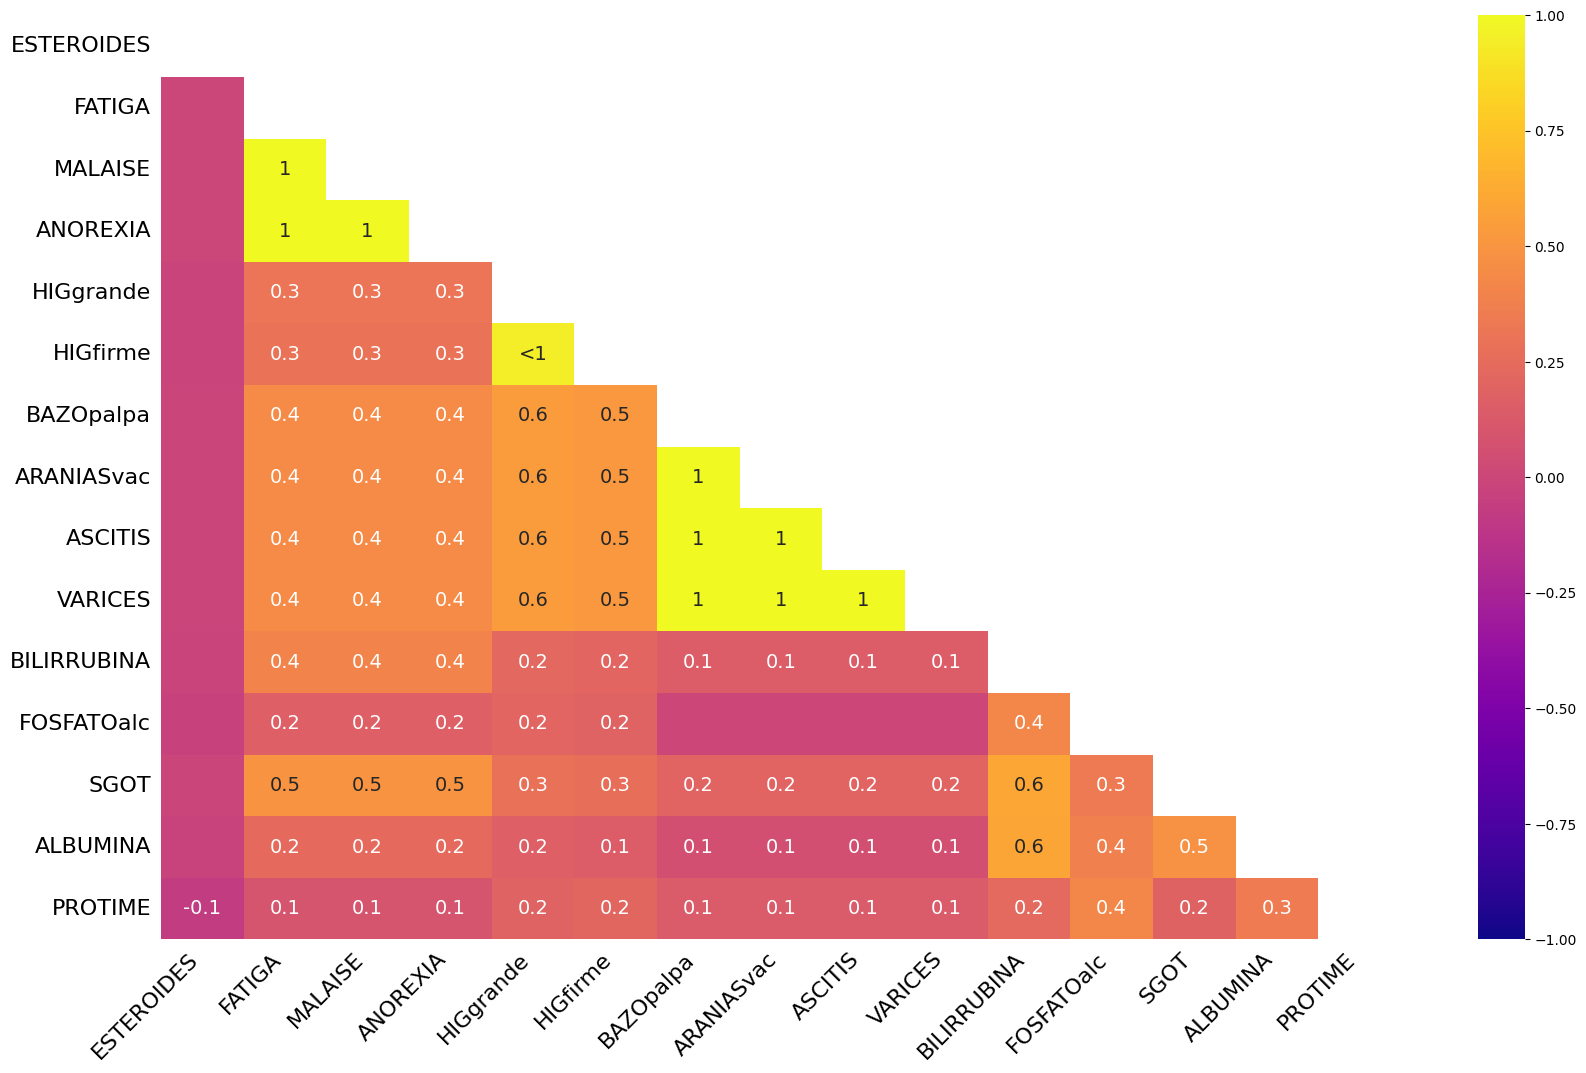

In [122]:
mi.heatmap(df, cmap='plasma')

Además de `missingno`, podemos emplear la librería `seaborn` para generar algunas visualizaciones sencillas.
Por ejemplo, con un mapa de calor podemos mostrar dónde se encuentran los datos faltantes dentro del dataframe. El siguiente código produce un mapa de calor:

In [123]:
import seaborn as sns
import matplotlib.pyplot as plt

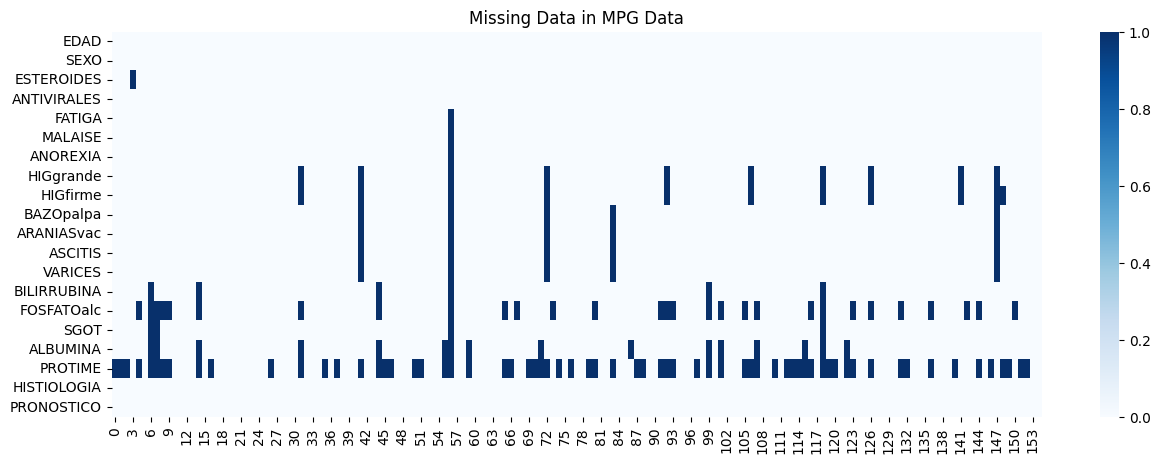

In [124]:
plt.subplots(figsize=(15,5))  
sns.heatmap(df.isnull().transpose(), cmap = 'Blues')
plt.title("Missing Data in MPG Data")
plt.show()

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Obten la/las fila/filas del dataframe con mayor número de datos faltantes. 

***Pista**: la operación de reducción `df.sum()` admite un parámetro adicional axis que permite indicar en que "dirección" se hará la reducción. Así, `df.sum(axis=0)` hará la reducción por columnas, mientas que `df.sum(axis=1)` la hará por filas.*
</div>

In [129]:
missing_count = df.isna().sum(axis=1)
max_missing = missing_count.max()
max_missing

np.int64(14)

In [ ]:
conteo_faltantes = df.isna().sum(axis=1)

filas_masNA = df[conteo_faltantes == conteo_faltantes.max()]
filas_masNA

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
56,34,FEMENINO,False,False,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,False,VIVE



## Imputación de valores ausentes

Como ya hemos visto, el proceso de imputación de valores ausentes consiste en la estimación de posibles valores para aquello campos en los que no tenemos una observación. Existen muchos métodos de imputación y [ninguno destaca sobre los demás](https://en.wikipedia.org/wiki/No_free_lunch_theorem). El método elegido dependerá de muchos factores como el tipo de datos (no todos los métodos de imputación admiten valores booleanos o factores), el tipo de problema, el rango de las variables, etc. 

### Imputación con el SimpleInputer

En `python` existen multitud de paquetes que ofrecen implementaciones de distintas técnicas de imputación. Aquí vamos a utilizar `scikit-learn`, específicamente el modulo [`sklearn.impute`](https://scikit-learn.org/stable/modules/impute.html).

A continuación se muestra cómo sería la imputación con variables reales. En este caso, se puede seleccionar como estrategia de imputación la media, la mediana, el valor más frecuente o una constante:

In [134]:
from sklearn.impute import SimpleImputer

# Mean Imputation
df_imp_mean = df.copy()

mean_imputer = SimpleImputer(strategy='mean')
df_imp_mean['BILIRRUBINA'] = mean_imputer.fit_transform(df_imp_mean[['BILIRRUBINA']])

df_imp_mean.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,MASCULINO,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,<NA>,False,VIVE
1,50,FEMENINO,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,<NA>,False,VIVE
2,78,FEMENINO,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,<NA>,False,VIVE
3,31,FEMENINO,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,VIVE
4,34,FEMENINO,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,<NA>,False,VIVE


Probemos ahora a imputar la misma variable empleando la mediana y veamos las diferencias: 

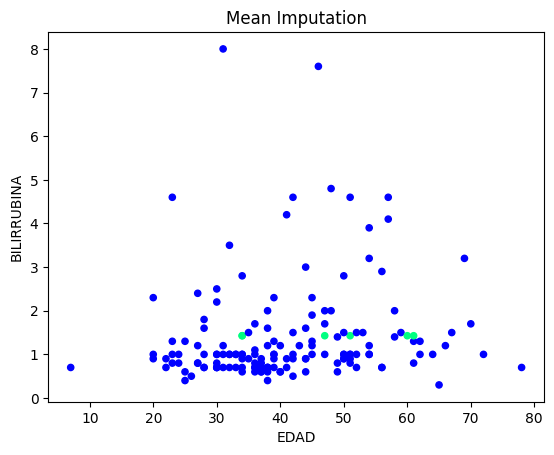

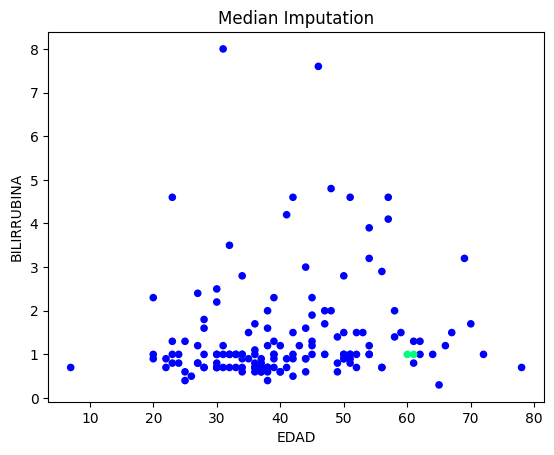

In [135]:
median_imputer = SimpleImputer(strategy='median')
df_imp_median = df.copy()
df_imp_median['BILIRRUBINA'] = median_imputer.fit_transform(df_imp_median[['BILIRRUBINA']])

missing_values = df['BILIRRUBINA'].isna()

fig = plt.Figure()
fig = df_imp_mean.plot(x="EDAD", y='BILIRRUBINA', kind='scatter', c=missing_values, cmap='winter', title='Mean Imputation', colorbar=False)

fig = plt.Figure()
fig = df_imp_median.plot(x="EDAD", y='BILIRRUBINA', kind='scatter', c=missing_values, cmap='winter', title='Median Imputation', colorbar=False)

<div class="alert alert-info">
  <strong>Ejercicio:</strong>
  
- Imputa la variable ALBUMNIA utilizando la media y la mediana.
</div>

Sin embargo, cuando la imputación se realiza a variables no-reales (enteras), solo se puede imputar por el valor más frecuente (moda) o con una constante:

In [189]:
most_frequent_imputer = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
df_imp_mean['SGOT'] = most_frequent_imputer.fit_transform(df_imp_mean[['SGOT']])
df_imp_mean['FOSFATOalc'] = most_frequent_imputer.fit_transform(df_imp_mean[['FOSFATOalc']])
df_imp_mean['PROTIME'] = most_frequent_imputer.fit_transform(df_imp_mean[['PROTIME']])
df_imp_mean.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,False,0,0,0,0,0,0,0,0,0,1.0,85.0,18.0,4.0,1.0,0,VIVE
1,50,0,0,False,1,0,0,0,0,0,0,0,0,0.9,135.0,42.0,3.5,1.0,0,VIVE
2,78,0,1,False,1,0,0,1,0,0,0,0,0,0.7,96.0,32.0,4.0,1.0,0,VIVE
3,31,0,<NA>,True,0,0,0,1,0,0,0,0,0,0.7,46.0,52.0,4.0,1.0,0,VIVE
4,34,0,1,False,0,0,0,1,0,0,0,0,0,1.0,85.0,200.0,4.0,1.0,0,VIVE


Lo mismo sucede con los tipos de datos lógicos:

In [ ]:
si = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
df_imp_mean['ESTEROIDES'] = si.fit_transform(df_imp_mean[['ESTEROIDES']])
df_imp_mean['ANTIVIRALES'] = si.fit_transform(df_imp_mean[['ANTIVIRALES']])
df_imp_mean['FATIGA'] = si.fit_transform(df_imp_mean[['FATIGA']])
df_imp_mean['MALAISE'] = si.fit_transform(df_imp_mean[['MALAISE']])
df_imp_mean['ANOREXIA'] = si.fit_transform(df_imp_mean[['ANOREXIA']])
df_imp_mean['HIGgrande'] = si.fit_transform(df_imp_mean[['HIGgrande']])
df_imp_mean['HIGfirme'] = si.fit_transform(df_imp_mean[['HIGfirme']])
df_imp_mean['BAZOpalpa'] = si.fit_transform(df_imp_mean[['BAZOpalpa']])
df_imp_mean['ARANIASvac'] = si.fit_transform(df_imp_mean[['ARANIASvac']])
df_imp_mean['ASCITIS'] = si.fit_transform(df_imp_mean[['ASCITIS']])
df_imp_mean['VARICES'] = si.fit_transform(df_imp_mean[['VARICES']])
df_imp_mean.head()

Y con las variables categóricas: 

In [ ]:
si = SimpleImputer(strategy='most_frequent', missing_values=pd.NA)
df_imp_mean['SEXO'] = si.fit_transform(df_imp_mean[['SEXO']])
df_imp_mean['PRONOSTICO'] = si.fit_transform(df_imp_mean[['PRONOSTICO']])
df_imp_mean.info()

<div class="alert alert-info">
<strong>Ejercicio</strong>

Comprueba cuantos valores faltantes quedan en el dataframe.
</div>

### Imputación con KNN

Otra forma de imputar los valores faltantes es mediante el uso de los k vecinos más cercanos (KNN). Por defecto, [este imputador](https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html) utiliza una extensión de la distancia euclídea con soporte para valores NaN para medir la distancia entre datos. Para cada valor ausente, su imputación se realiza tomando los k vecinos más cercanos que tienen un valor para la característica.  

In [212]:
from sklearn.impute import KNNImputer

# Mean Imputation
df_imp_knn = df.copy()

knn_imputer = KNNImputer(n_neighbors=2, weights="uniform")
df_imp_knn['BILIRRUBINA'] = knn_imputer.fit_transform(df_imp_knn[['BILIRRUBINA']])
df_imp_knn.head()

,EDAD,SEXO,ESTEROIDES,ANTIVIRALES,FATIGA,MALAISE,ANOREXIA,HIGgrande,HIGfirme,BAZOpalpa,ARANIASvac,ASCITIS,VARICES,BILIRRUBINA,FOSFATOalc,SGOT,ALBUMINA,PROTIME,HISTIOLOGIA,PRONOSTICO
0,30,1,0,False,0,0,0,0,0,0,0,0,0,1.0,85,18,4.0,<NA>,0,VIVE
1,50,0,0,False,1,0,0,0,0,0,0,0,0,0.9,135,42,3.5,<NA>,0,VIVE
2,78,0,1,False,1,0,0,1,0,0,0,0,0,0.7,96,32,4.0,<NA>,0,VIVE
3,31,0,<NA>,True,0,0,0,1,0,0,0,0,0,0.7,46,52,4.0,80,0,VIVE
4,34,0,1,False,0,0,0,1,0,0,0,0,0,1.0,<NA>,200,4.0,<NA>,0,VIVE


### Multivariate Imputation by Chained Equation — MICE

[Este algoritmo](https://scikit-learn.org/stable/modules/generated/sklearn.impute.IterativeImputer.html) es uno de los más usados para imputación de valores faltantes. Primero calcula la media de cada columna donde haya un valor ausente y usa el valor medio como marcador. A partir de ahí ejecuta una serie de modelos de regresión (ecuaciones encadenadas) para imputar cada valor ausente de forma secuencial.

<div class="alert alert-danger">
<strong>Atención:</strong>

La implementación de MICE de `sklearn` es experimental. Para poder usarla debeis activarla explicitamente con el siguiente import:

`from sklearn.experimental import enable_iterative_imputer`
</div>

In [ ]:
# Imputing with MICE
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

df_mice = df.filter(['BILIRRUBINA','ALBUMINA'], axis=1).copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(n_nearest_features=None, imputation_order='ascending')

df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)
df_mice_imputed.head()

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Imputa los valores para la bilirrubina y la albumina empleando `MICE` y `LinearRegression` y `ElasticNet` como estimadores.

***Pista**: los estimadores deben ser modelos lineales. Puedes consultar la lista de modelos disponibles importando `linear_model` de `sklearn`*
</div>


## Clases desbalanceadas 

Otro de los probelmas que encontramos más habitualmente cuando procesamos datos es la presencia de clases desbalanceadas. Esto es, la presencia en mucha mayor medida de ejemplos que representan a una de las clases. En este apartado vamos a analizar cómo aplicar técnicas de muestreo para equilibrar el número de instancias entre las distintas clases en un problema con clases desbalanceadas. Aplicaremos técnicas de submuestreo (down-sampling), sobremuestreo (up-sumpling) y `SMOTE`. 

Si comprobamos nuestro dataset, podemos ver que la clase `PRONOSTICO` está claramente desbalanceada hacia las personas que superan la enfermedad:

In [216]:
df['PRONOSTICO'].value_counts()

PRONOSTICO
VIVE       123
FALLECE     32
Name: count, dtype: int64

Procedamos a balancear nuestro dataset. Para ello, primero, crearemos dos conjuntos con los datos de la clase `PRONOSTICO` por separado, uno con las personas que viven y otra con las que mueren: 

In [218]:
viven = df[df['PRONOSTICO'] == "VIVE"]
mueren  = df[df['PRONOSTICO'] == "FALLECE"]

Podemos balancear el conjunto de datos haciendo un submuestreo/sobremuestro a través de la función `resample` de `sklearn.utils`:

In [ ]:
from sklearn.utils import resample

viven_downsample = resample(viven, replace=True, n_samples=len(mueren), random_state=42)

(32, 20)


Para generar el conjunto de datos balanceado simplemente debemos concatenar los datos generados con los que teniamos:

In [221]:
data_downsampled = pd.concat([viven_downsample, mueren])

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Genera un dataset balanceado a partir de los datos presentes en el dataset original.
</div>

El principal problema de estos métodos es que son totalmente aleatorios y lo único que hacen es repetir observaciones. Un método algo más avanzado para realizar sobremuestreo es `SMOTE`. Este genera nuevas observaciones a partir de las ya existentes mediante interpolación. 

Para emplearlo, debemos primero importarlo desde el paquete `imbalanced-learn`:

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from imblearn.pipeline import make_pipeline

Eliminamos la variable `SEXO`, ya que `SMOTE` no soporta valores categóricos:

In [223]:
X = df.filter(["EDAD", "ESTEROIDES", "ANTIVIRALES","FATIGA", "MALAISE", 
            "ANOREXIA", "HIGgrande", "HIGfirme", "BAZOpalpa", "ARANIASvac", 
            "ASCITIS", "VARICES", "BILIRRUBINA", "FOSFATOalc", "SGOT", 
            "ALBUMINA", "PROTIME", "HISTIOLOGIA"], axis=1).copy()
y = df.filter(['PRONOSTICO'], axis=1).copy()

Creamos la instancia de `SMOTE` y transformamos el dataset. Dado que `SMOTE` tampoco soporta valores de tipo `NA` o `NaN` creamos un pipeline en el que primero aplicamos el `SimpleImputer` de `sklearn` y `SMOTE` a continuación:

In [ ]:
# transform the dataset
smote = SMOTE()
# Es necesario este pipeline para dar soporte a los NaN. Por defecto smote no los soporta.
smote_enn = make_pipeline(SimpleImputer(), SMOTEENN(smote=smote))
A, b = smote_enn.fit_resample(X, y)

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Genera un dataframe balanceado a partir de los datos devueltos por la ejecución anterior. ¿Que tamaño tiene el nuevo dataframe? ¿Cuantas muestras tenemos de cada clase?
</div>

## Normalización y estandarización de los datos

Muchos algoritmos de aprendizaje automático funcionan mejor cuando las variables numéricas de entrada se escalan a un rango estándar.

Esto incluye algoritmos que utilizan una suma ponderada de la entrada, como la regresión lineal, y algoritmos que utilizan medidas de distancia, como k-vecinos más cercanos.

Las dos técnicas más populares para escalar datos numéricos antes de modelarlos son la normalización y la estandarización. La normalización escala cada variable de entrada por separado al intervalo [0-1], que es el intervalo para valores de coma flotante donde tenemos la mayor precisión. La estandarización escala cada variable de entrada por separado restando la media (llamado centrado) y dividiendo por la desviación estándar para cambiar la distribución y tener una media de cero y una desviación estándar de uno.

En esta práctica, utilizaremos `sklearn` tanto para la normalización como para la estandarización.

Como hemos dicho anteriormente, la normalización consiste en reescalar los datos del intervalo original para que todos los valores se encuentren dentro del nuevo intervalo de 0 y 1. Para ello, es necesario conocer los valores mínimos y máximos observables. Un método sencillo para escalar los valores es el implementado en la clase `MinMaxScaler`, que recibe el conjunto de datos a normalizar y devuelve los datos escalados:

In [228]:
from sklearn.preprocessing import MinMaxScaler

# transofrm data
scaler = MinMaxScaler()
rescaled = scaler.fit_transform(df_imp_mean[['BILIRRUBINA']])

(rescaled.min(), rescaled.max())

(np.float64(0.0), np.float64(0.9999999999999999))

Si por el contrario queremos estandarizar un conjunto de datos, (es decir, reescalar la distribución de los valores de forma que la media de los valores observados sea 0 y la desviación típica sea 1), podemos emplear la clase `StandardScaler`.

Para aplicar estandarización los datos deberian ajustarse a una distribución gaussiana (curva de campana) con una media y una desviación estándar bien definidas. Si bien se puede estandarizar datos que no cumplan esta condición, los resultados pueden ser poco fiables.

In [230]:
from sklearn.preprocessing import StandardScaler

# scaler
scaler = StandardScaler()
rescaled = scaler.fit_transform(df_imp_mean[['BILIRRUBINA']])

Aparte de estos, existen otros muchos métodos de estadarización y normalización. Podeis echarle un ojo a una comparativa en la [web de scikit-learn](https://scikit-learn.org/stable/auto_examples/preprocessing/plot_all_scaling.html). 

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Normaliza los datos del dataframe `df_imp_mean` empleando el método robusto implementado en [`sklearn.preprocessing.RobustScaler`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html). ¿Cuales son los valores máximo y mínimo para la bilirrubina empleando este método? ¿Por que? 
</div>

## Discretización

La discretización permite convertir valores numéricos en nominales ordenados. Este proceso se puede realizar utilizando la librería `sklearn`. Los valores de la variable se agrupan en intervalos discretos y a cada intervalo se le asigna un número entero único de forma que se mantenga la relación ordinal entre los intervalos.

El uso de intervalos suele denominarse *binning* o *k-bins*, donde k se refiere al número de grupos a los que se asigna una variable numérica.

La asignación proporciona una clasificación de alto orden de los valores que puede suavizar las relaciones entre las observaciones. La transformación puede aplicarse a cada variable numérica de entrada en el conjunto de datos de entrenamiento y, a continuación, proporcionarse como entrada a un modelo de aprendizaje automático para aprender una tarea de modelado predictivo.

Se pueden utilizar distintos métodos para agrupar los valores en k intervalos discretos:
- *Uniforme*: Cada recipiente tiene la misma anchura en el intervalo de valores posibles para la variable.
- *Cuantil*: Cada intervalo tiene el mismo número de valores, divididos según percentiles.
- *Clústering*: Se identifican grupos y se asignan ejemplos a cada grupo.

La discretización se realiza a través de la clase [`KBinsDiscretizer`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.KBinsDiscretizer.html). El parámetro `strategy` controla la forma de dividir la variable de entrada, y puede tomar los valores `uniform`, `quantile`, o `kmeans`.

[array([ 7. , 21.2, 35.4, 49.6, 63.8, 78. ])]


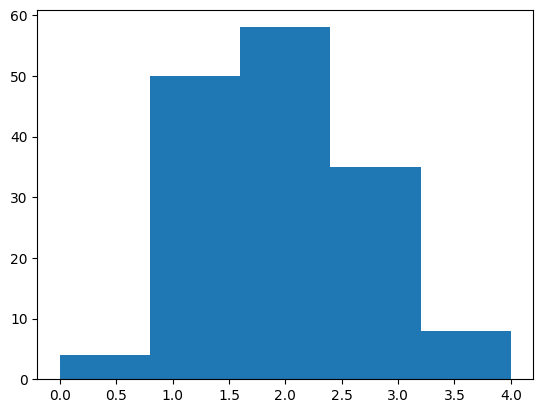

In [ ]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
data_trans = kbins.fit_transform(df_imp_mean[['EDAD']])
plt.hist(data_trans, bins=5)
plt.show()

<div class="alert alert-info">
<strong>Ejercicio:</strong>

Discretiza la variable `edad` en 7 bins, empleando la estrategia adecuada para que todos los bins tengan la misma cantidad de observaciones. ¿Cuales son los límites de los bins generados?¿Cuantas observaciones contiene cada bin? 
</div>

## Codificación de variables categóricas

Muchos algoritmos no soportan el uso de variables categóricas. Por ello, para poder emplearlo, muchas veces tenemos que transformar nuestros datasets. Para esto se emplean los `encoders`. Existen multitud de `econders` dependiendo del caso de uso que queramos darlo. Uno de los más comunes es el [`OneHotEncoder`](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html). Este encoder genera una serie de variables booleanas para cada categoria de entrada, asignando un 1 al valor correspondiente a la observacion, y un 0 al resto de variables. Por ejemplo:

In [246]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False)
data = pd.DataFrame(encoder.fit_transform(df_imp_mean[['SEXO']]), columns=encoder.get_feature_names_out())
data.head()

,SEXO_0,SEXO_1
0,0.0,1.0
1,1.0,0.0
2,1.0,0.0
3,1.0,0.0
4,1.0,0.0


<div class="alert alert-info">
<strong>Ejercicio:</strong>

¿Cuantas variables se generarían aplicando un OneHotEncoder a dos variables, una con los días de la semana (de lunes a viernes) y otra con los meses del año?¿Que otro enconder podríamos emplear para que se generen menos variables?¿Que características tienen que tener nuestros datos para que tenga sentido aplicar ese otro encoder?
</div>